In [1]:
import sys
# import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'../skylens/')
# from importlib import reload

In [2]:
from skylens import *

In [45]:
#setup parameters
lmax_cl=5000
lmin_cl=0
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-1
Nl_bins=20
l_bins=np.unique(np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins)))
l_bins=np.append(0,l_bins)
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl+0.01),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=False
tidal_SSV_cov=False
Tri_cov=False

In [46]:
d2r=np.pi/180.

In [47]:
xi_win_approx=True
do_xi=True
bin_xi=True
bin_cl=True
th_min=25/60
th_max=250./60
n_th_bins=20
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins*40)
thb=np.sqrt(th_bins[1:]*th_bins[:-1])

In [48]:
#Hankel Transform setup
WT_kwargs={'l':l0,'theta':th*d2r,'s1_s2':[(2,2),(2,-2),(0,0),(0,2)]}
WT=wigner_transform(wig_d_taper_order_low=6,wig_d_taper_order_high=8,**WT_kwargs)
WT_taper=wigner_transform(wig_d_taper_order_low=11,wig_d_taper_order_high=11,**WT_kwargs)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:51: RuntimeWarning: divide by zero encountered in true_divide
  taper_f=np.cos((self.l[None,:]-l_max_low[:,None])/(l_max_high[:,None]-l_max_low[:,None])*np.pi/2.)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:51: RuntimeWarning: invalid 

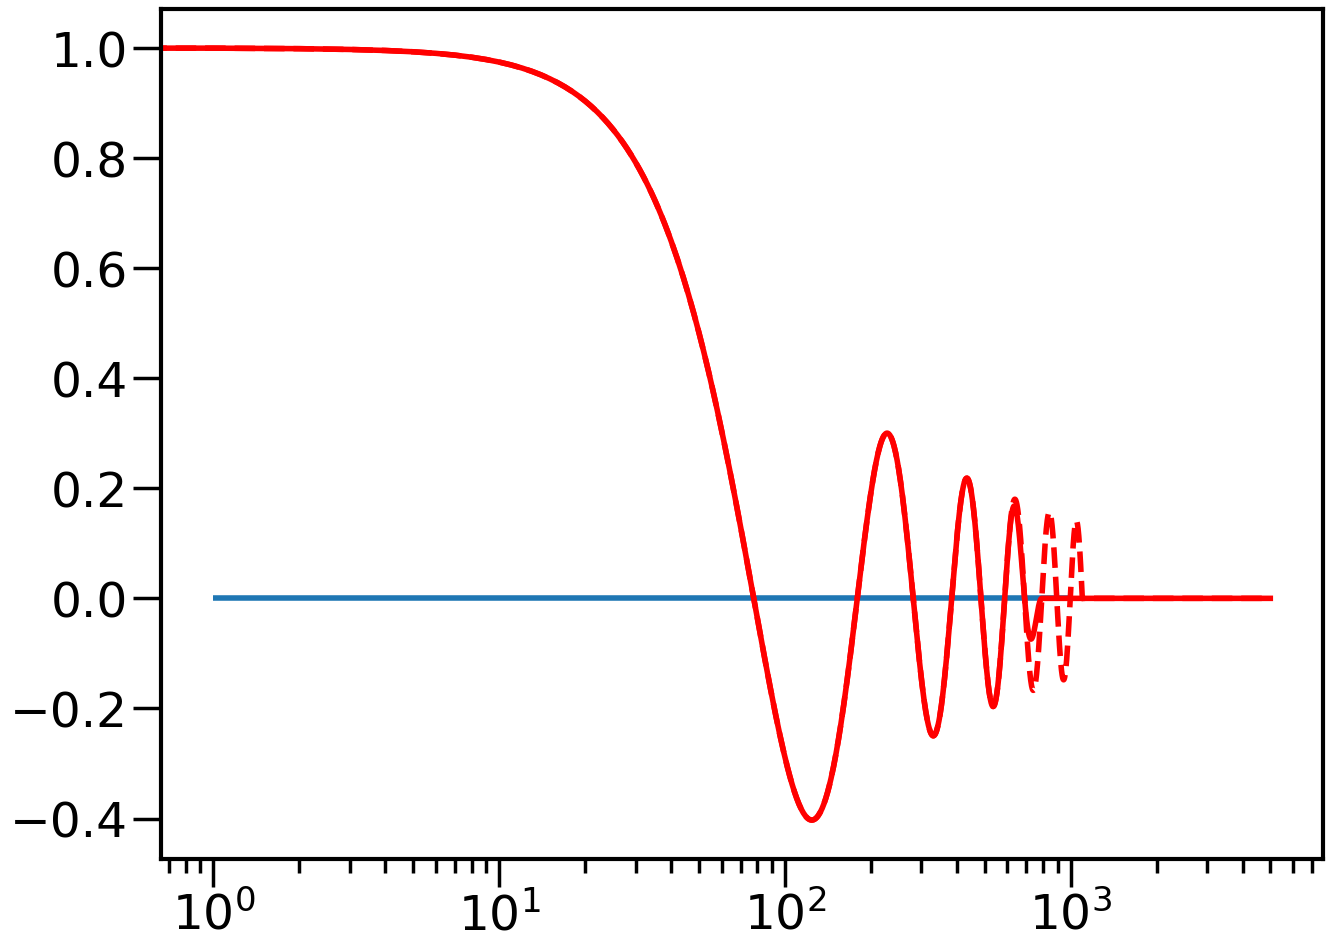

In [49]:
s=(0,0)
i_theta=10
# plot(WT.l,WT.wig_d[s][i_theta,:],c='b')
# plot(WT.l,WT_taper.wig_d[s][i_theta,:],c='b',ls='--')
# vlines(np.pi/WT.theta[i_theta]/1.25,-0.4,1,color='b')
i_theta=500
plot(WT.l,WT.wig_d[s][i_theta,:],'-',c='r')
plot(WT.l,WT_taper.wig_d[s][i_theta,:],c='r',ls='--')
# vlines(np.pi/WT.theta[i_theta]/1.25,-0.4,1,color='r')
# vlines(np.pi/WT.theta[i_theta]/1.25*2.15,-0.4,1,color='r')

hlines(0,1,1000)
xscale('log')

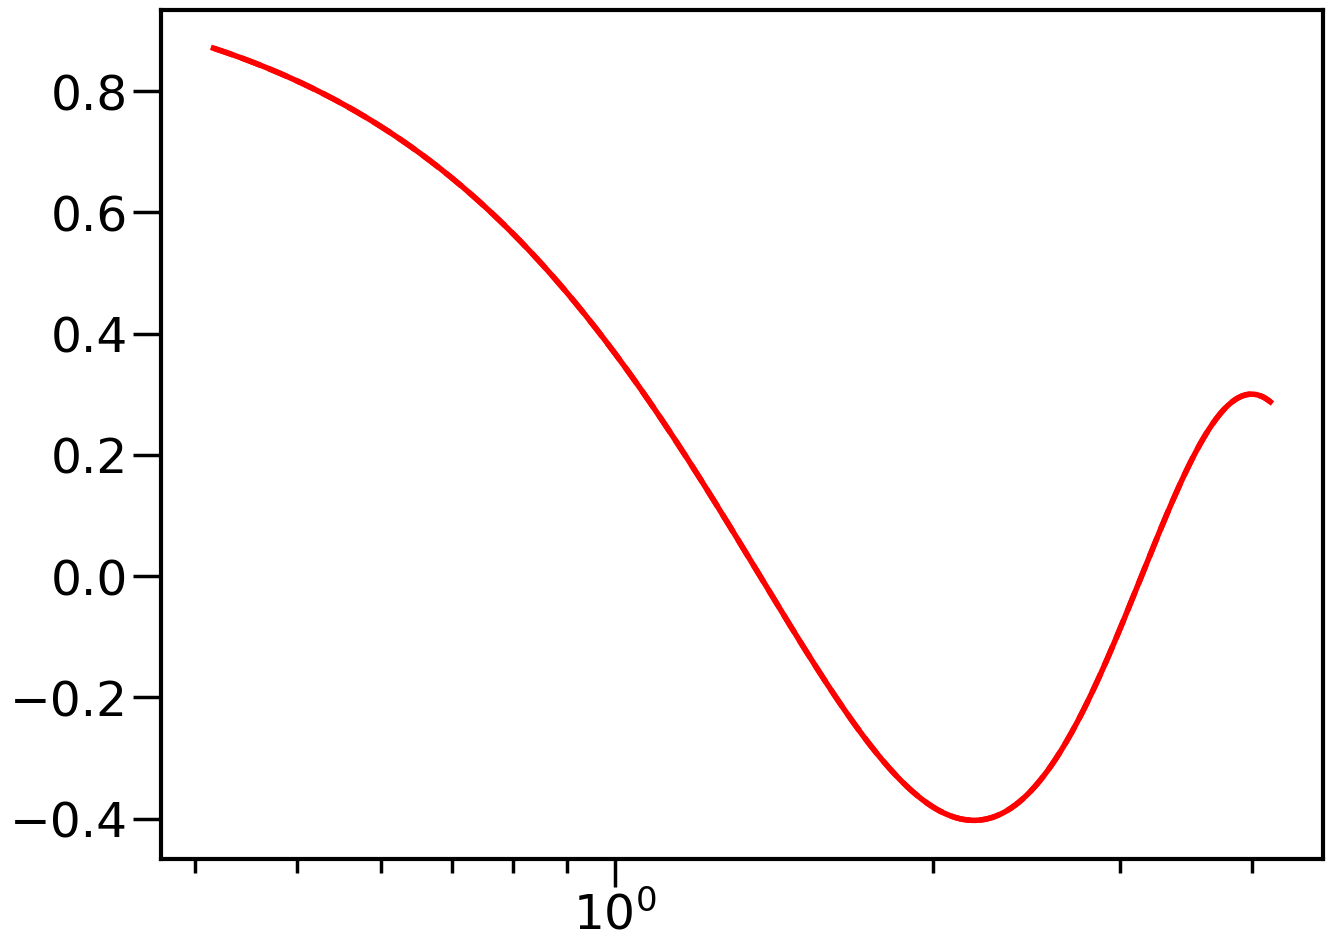

In [50]:
s=(0,0)
i_l=100
plot(th,WT.wig_d[s][:,i_l],'-',c='r')
plot(th,WT_taper.wig_d[s][:,i_l],c='r',ls='--')
xscale('log')

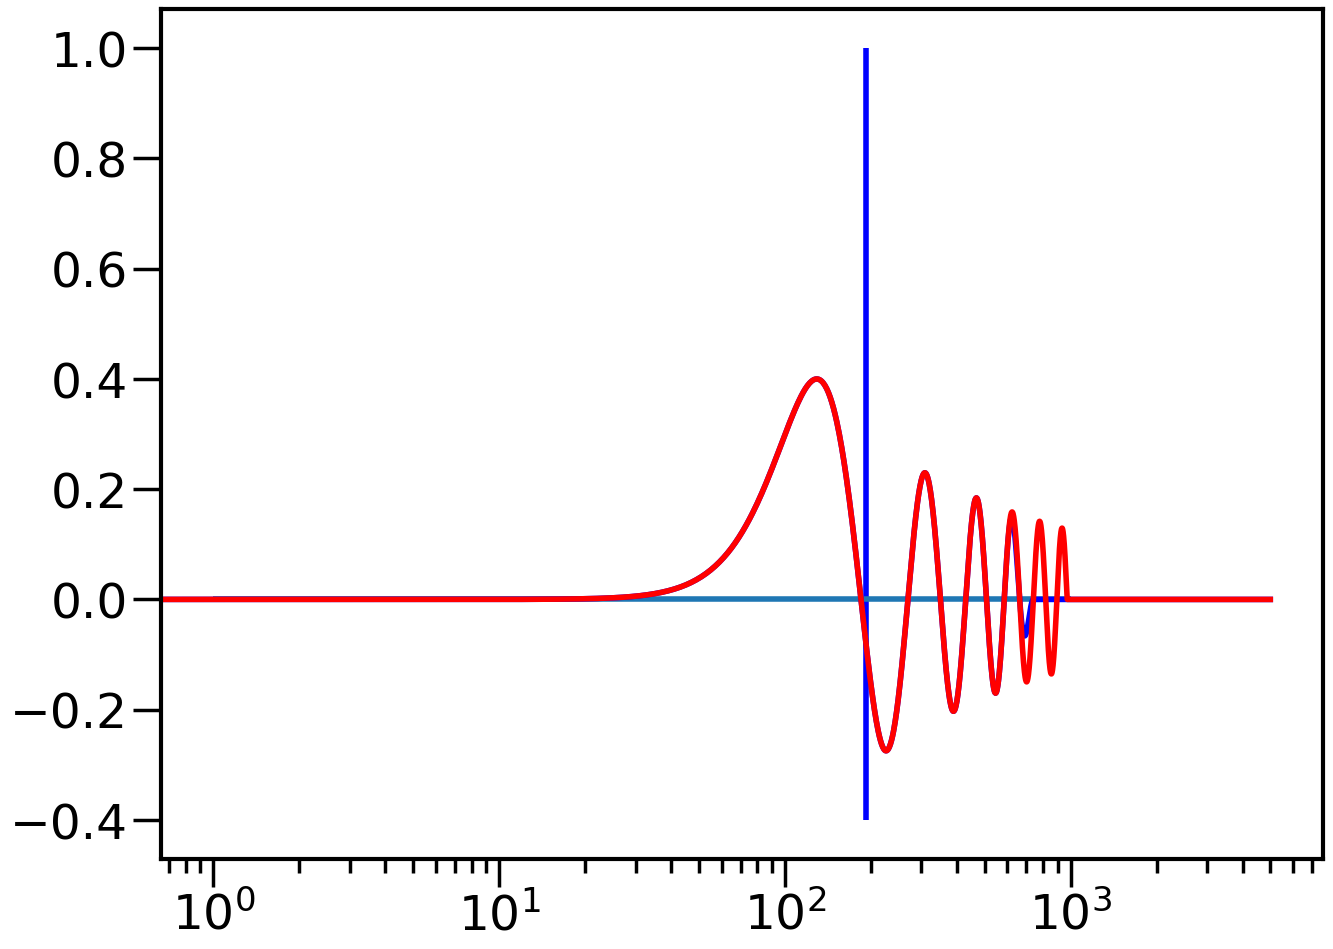

In [51]:
s=(2,-2)
i_theta=600
plot(WT.l,WT.wig_d[s][i_theta,:],c='b')
plot(WT.l,WT_taper.wig_d[s][i_theta,:],c='r')
vlines(np.pi/WT.theta[s][i_theta]*2.5,-0.4,1,color='b')
# i_theta=400
# plot(WT.l,WT.wig_d[s][i_theta,:],'--',c='r')
# vlines(np.pi/WT.theta[i_theta],-0.4,1,color='r')
# vlines(np.pi/WT.theta[i_theta],-0.4,1,color='r')

hlines(0,1,1000)
xscale('log')

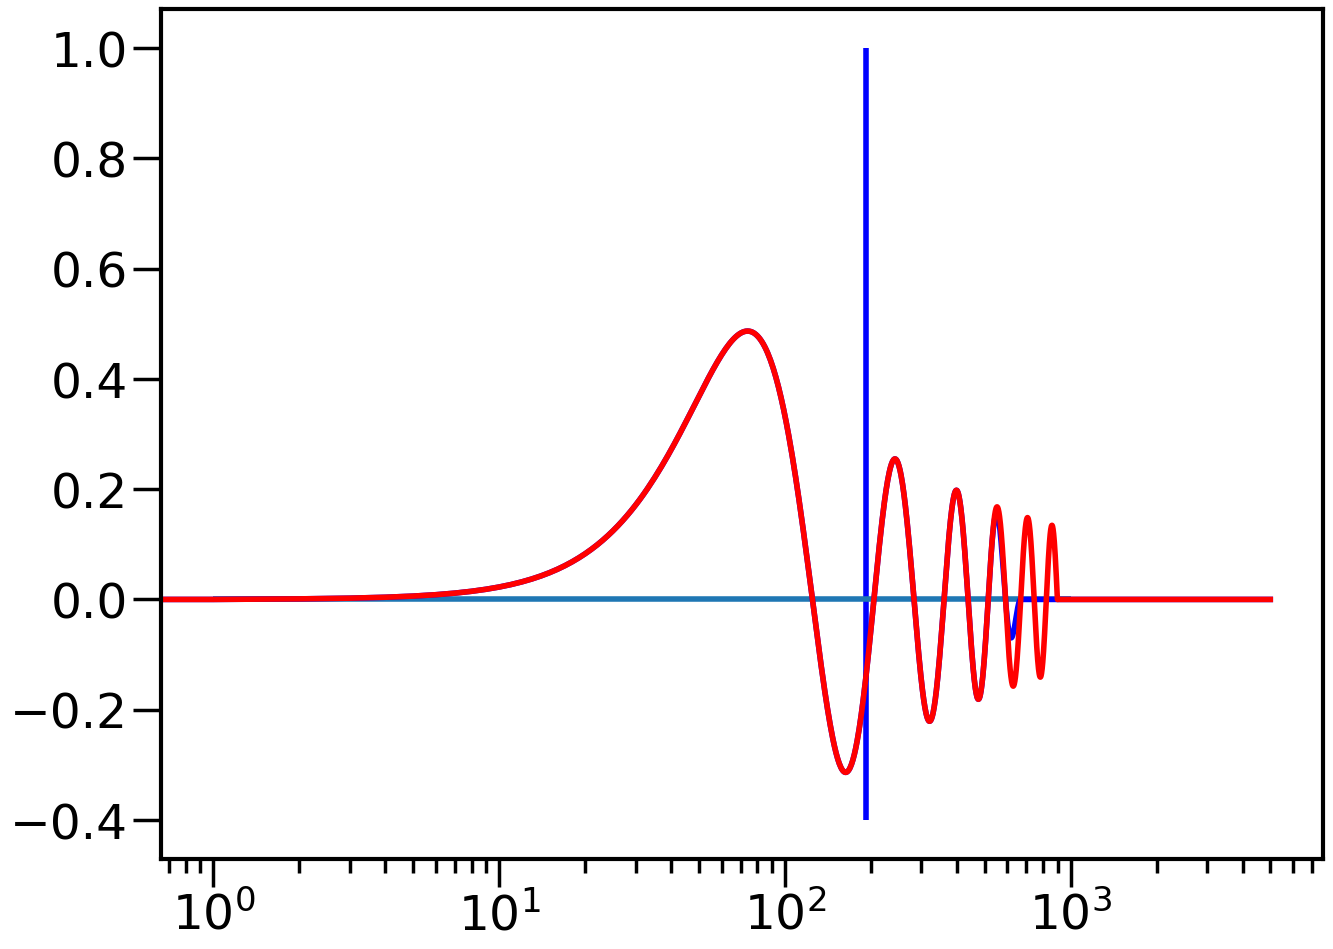

In [52]:
s=(0,2)
i_theta=600
plot(WT.l,WT.wig_d[s][i_theta,:],c='b')
plot(WT.l,WT_taper.wig_d[s][i_theta,:],c='r')
vlines(np.pi/WT.theta[s][i_theta]*2.5,-0.4,1,color='b')
# i_theta=400
# plot(WT.l,WT.wig_d[i_theta,:],'--',c='r')
# vlines(np.pi/WT.theta[i_theta],-0.4,1,color='r')
# vlines(np.pi/WT.theta[i_theta],-0.4,1,color='r')

hlines(0,1,1000)
xscale('log')

In [53]:
from scipy.special import jn, jn_zeros,jv


In [54]:
wig_d_smooth_order_high=5
wig_d_smooth_order_low=2

In [55]:
s1s2=s
bessel_order=np.absolute(s1s2[0]-s1s2[1])
zeros=jn_zeros(bessel_order,wig_d_smooth_order_high)
l_max_high=zeros[wig_d_smooth_order_high-1]/WT.theta[s]
l_max_low=zeros[wig_d_smooth_order_low-1]/WT.theta[s]
l_max_low[l_max_low>WT.l.max()]=WT.l.max()
l_max_high[l_max_high>WT.l.max()]=WT.l.max()

In [56]:
taper=np.ones_like(WT.wig_d[s1s2])

In [57]:
WT.wig_d[s1s2].shape
l_max_low.shape,WT.l.shape

((800,), (5000,))

In [58]:
x=WT.l[None,:]>l_max_low[:,None]
y=WT.l[None,:]>l_max_high[:,None]

In [59]:
taper_f=np.cos((WT.l[None,:]-l_max_low[:,None])/(l_max_high[:,None]-l_max_low[:,None])*np.pi/2.)
taper_f[~x]=1
taper_f[y]=0

In [60]:
taper_f

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [61]:
wid_d_taper=WT.wig_d[s]*taper_f

In [62]:
np.arange(10)[:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

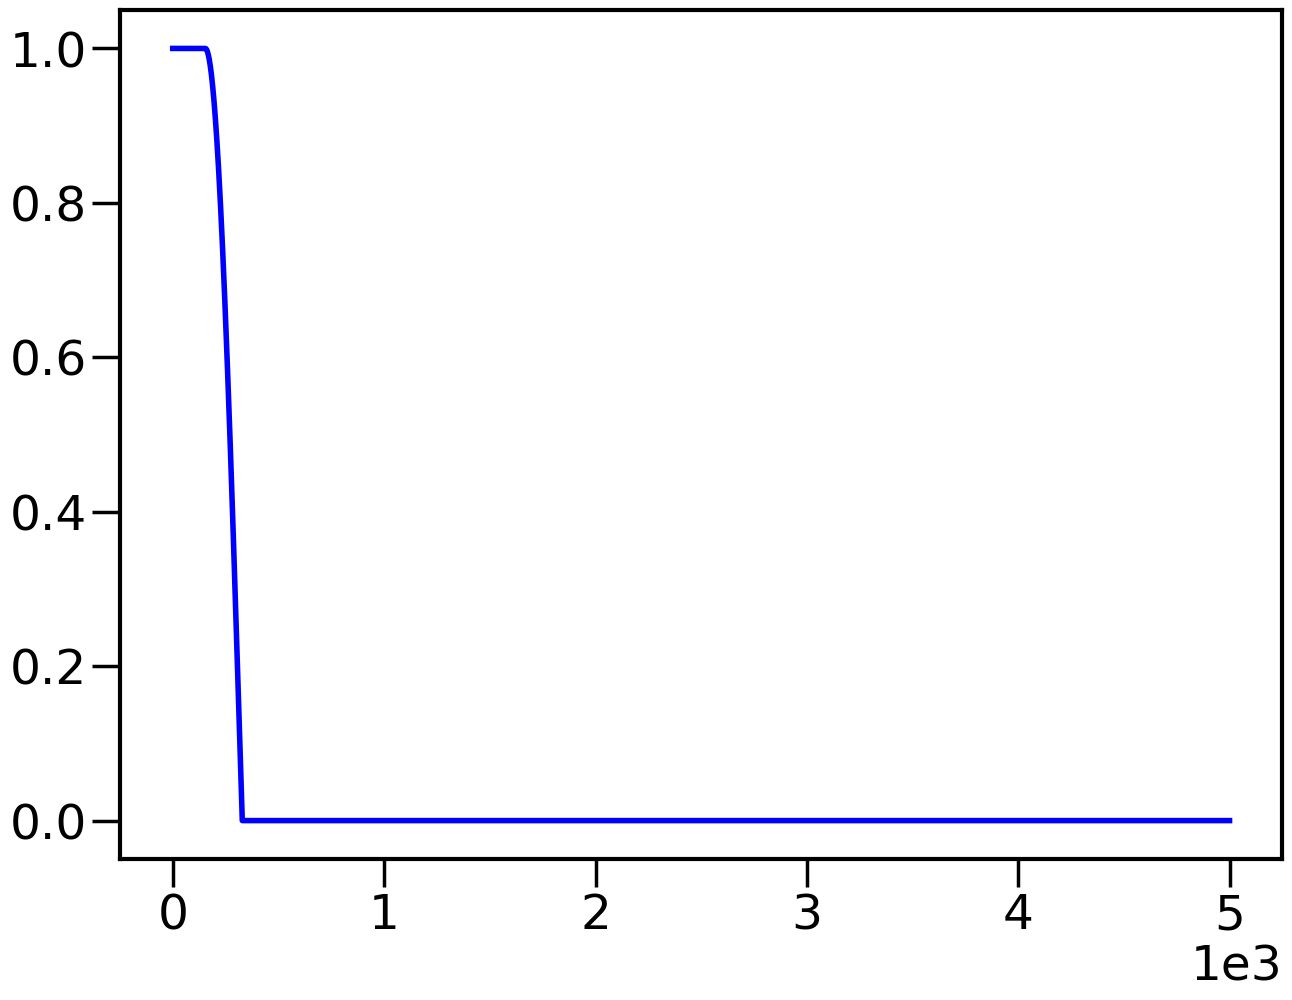

In [63]:
i_theta=700
plot(WT.l,taper_f[i_theta,:],c='b')

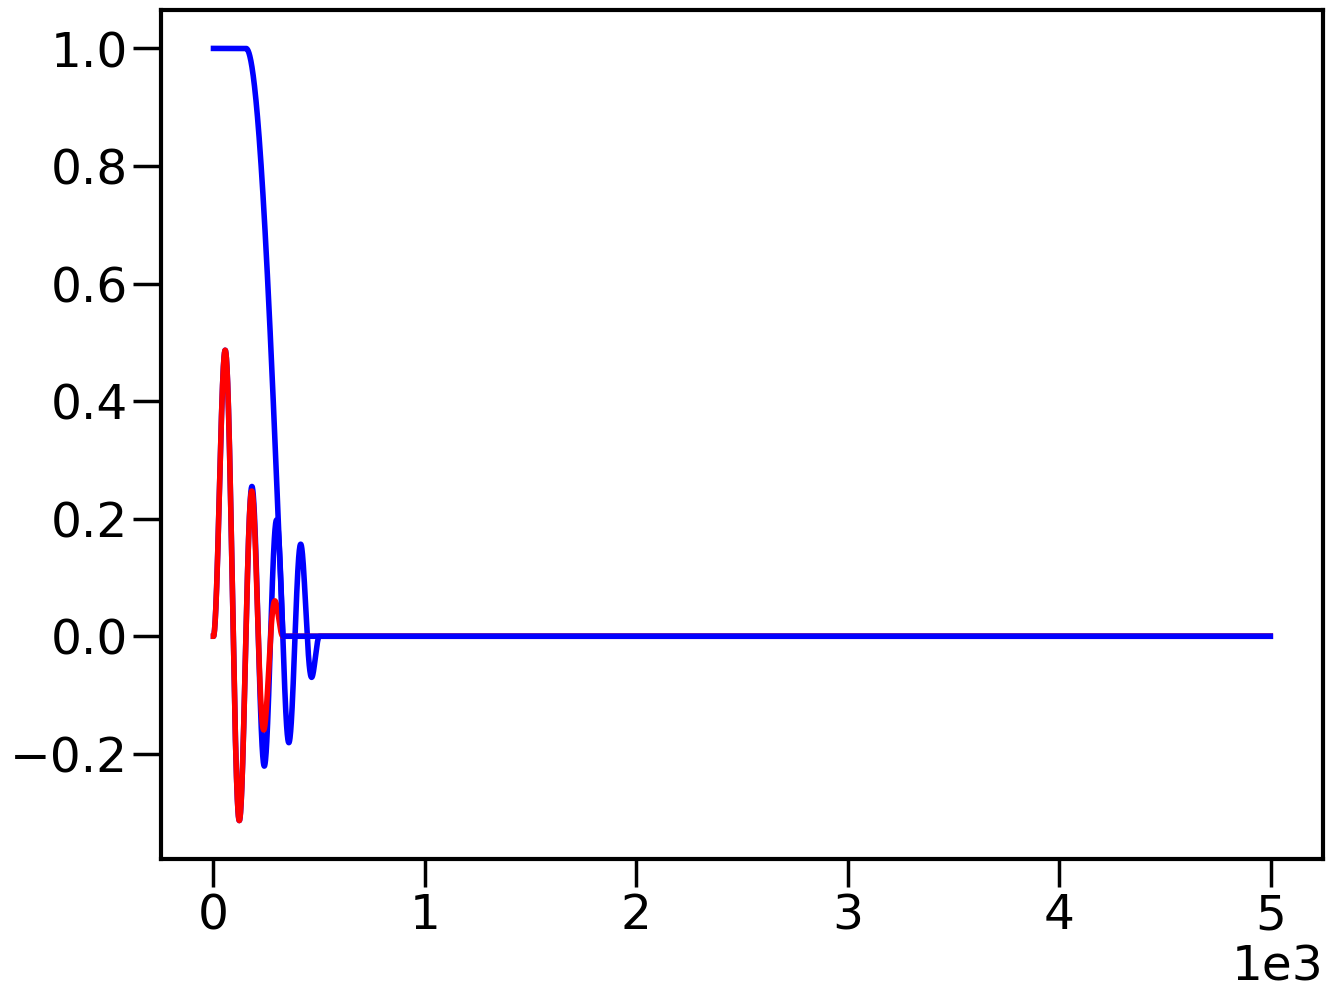

In [64]:
i_theta=700
plot(WT.l,WT.wig_d[s][i_theta,:],c='b')
plot(WT.l,wid_d_taper[i_theta,:],c='r')
plot(WT.l,taper_f[i_theta,:],c='b')

In [65]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
c=LocalCluster(n_workers=1,processes=False,memory_limit='25gb',threads_per_worker=4,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(c)

10:45:05 DEBUG:Using selector: EpollSelector
10:45:05 DEBUG:Using selector: EpollSelector
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 45351 instead
  warnings.warn(


In [66]:
use_window=True
store_win=True
window_lmax=30

In [67]:
z0=1 #1087
# zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=nside)
zs_bin1=lsst_source_tomo_bins(nbins=1,use_window=use_window,nside=64,ns0=.3)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/cov_utils.py:74: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:396: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/survey_utils.py:127: RuntimeWarning: invalid value encountered in sqrt


In [68]:
#Hankel Transform setup
WT_kwargs={'l':l0,'theta':th*d2r,'s1_s2':[(2,2),(2,-2),(0,0),(0,2)]}
WT=wigner_transform(wig_d_taper_order_low=50,wig_d_taper_order_high=54,**WT_kwargs)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:51: RuntimeWarning: divide by zero encountered in true_divide
  taper_f=np.cos((self.l[None,:]-l_max_low[:,None])/(l_max_high[:,None]-l_max_low[:,None])*np.pi/2.)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:51: RuntimeWarning: invalid value encountered in true_divide
  taper_f=np.cos((self.l[None,:]-l_max_low[:,None])/(l_max_high[:,None]-l_max_low[:,None])*np.pi/2.)
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_transform.py:51: RuntimeWarning: invalid value encountered in cos
  taper_f=np.cos((self.l[None,:]-l_max_low[:,None])/(l_max_hi

In [69]:
WT_taper=wigner_transform(wig_d_taper_order_low=12,wig_d_taper_order_high=14,**WT_kwargs)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: invalid value encountered in true_divide
/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/wigner_functions.py:46: RuntimeWarning: divide by zero encountered in true_divide


In [70]:
bin_xi=True

In [71]:
xi_SN_analytical=True

In [72]:
kappa_xi0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                       use_window=use_window,Tri_cov=Tri_cov,
                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                       store_win=store_win,window_lmax=window_lmax,
                      do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                      use_binned_l=False,use_binned_theta=False,
                      nz_PS=10,do_pseudo_cl=False,xi_win_approx=True,
                 xi_SN_analytical=xi_SN_analytical)
kappa_xi0_taper=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                       use_window=use_window,Tri_cov=Tri_cov,
                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                       store_win=store_win,window_lmax=window_lmax,
                      do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT_taper,
                      use_binned_l=False,use_binned_theta=False,
                      nz_PS=10,do_pseudo_cl=False,xi_win_approx=True,
                       xi_SN_analytical=xi_SN_analytical)

/verafs/scratch/phy200040p/sukhdeep/miniconda3/lib/python3.8/site-packages/skylens-0.1-py3.8.egg/skylens/window_utils.py:269: RuntimeWarning: invalid value encountered in sqrt
  map1=np.sqrt(z_bin1['window'])


In [73]:
%time clHG0=kappa_xi0.cl_tomo()
cl=clHG0['stack'].compute()

In [74]:
cl['pcl_b'],zs_bin1['SN']

(array([4.17353864e-08, 4.36103728e-08, 4.05341440e-08, 3.57729520e-08,
        2.76886762e-08, 2.02309954e-08, 1.52080518e-08, 1.03808883e-08,
        6.83922596e-09, 4.48553430e-09, 2.89526353e-09, 1.86456739e-09,
        1.22284102e-09, 8.20962663e-10, 5.58787352e-10, 3.79493769e-10,
        2.50818085e-10, 1.58193420e-10, 9.47381761e-11, 5.44330239e-11]),
 {'galaxy': array([[[2.82053166e-07]]]),
  'shear': array([[[1.90667941e-08]]]),
  'kappa': array([[[1.90667941e-08]]])})

In [75]:
%time xiHG0=kappa_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()

In [76]:
%time xiHG0t=kappa_xi0_taper.xi_tomo()
%time xiH0t=xiHG0t['stack'].compute()

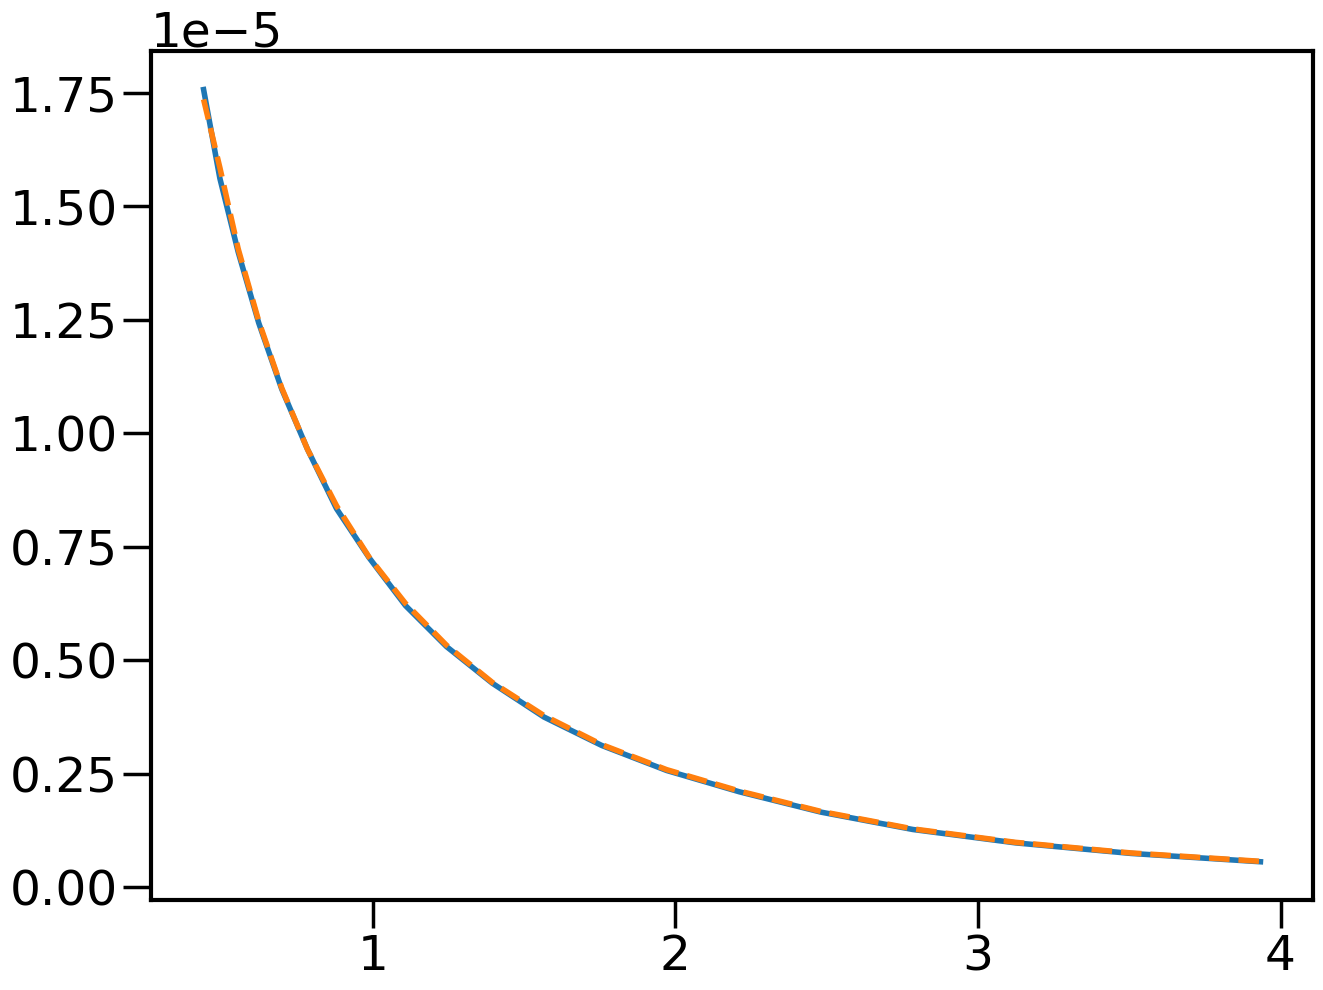

In [77]:
plot(thb,xiH0['xi'][:20])
plot(thb,xiH0t['xi'][:20],'--')

In [78]:
np.diag(xiH0['cov'])[:20]

array([6.77883934e-13, 6.20652859e-13, 5.66840347e-13, 5.16513708e-13,
       4.69589207e-13, 4.25932857e-13, 3.85400078e-13, 3.47829391e-13,
       3.13095319e-13, 2.80783645e-13, 2.50832834e-13, 2.23433126e-13,
       1.98500969e-13, 1.75898310e-13, 1.55509322e-13, 1.37274761e-13,
       1.21207334e-13, 1.06538331e-13, 9.25874368e-14, 8.03632226e-14])

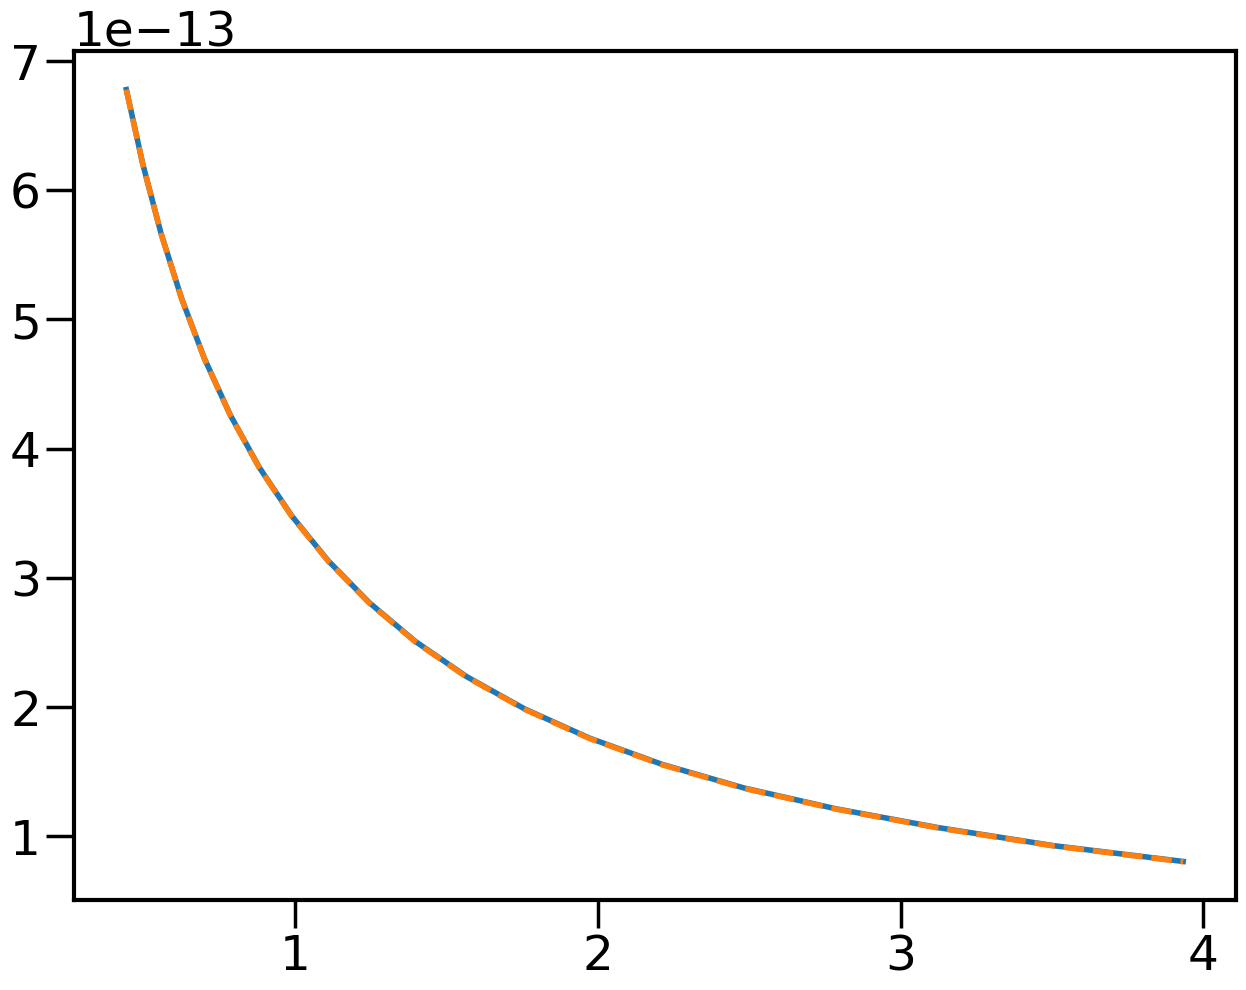

In [79]:
plot(thb,np.diag(xiH0['cov'])[:20])
plot(thb,np.diag(xiH0t['cov'])[:20],'--')

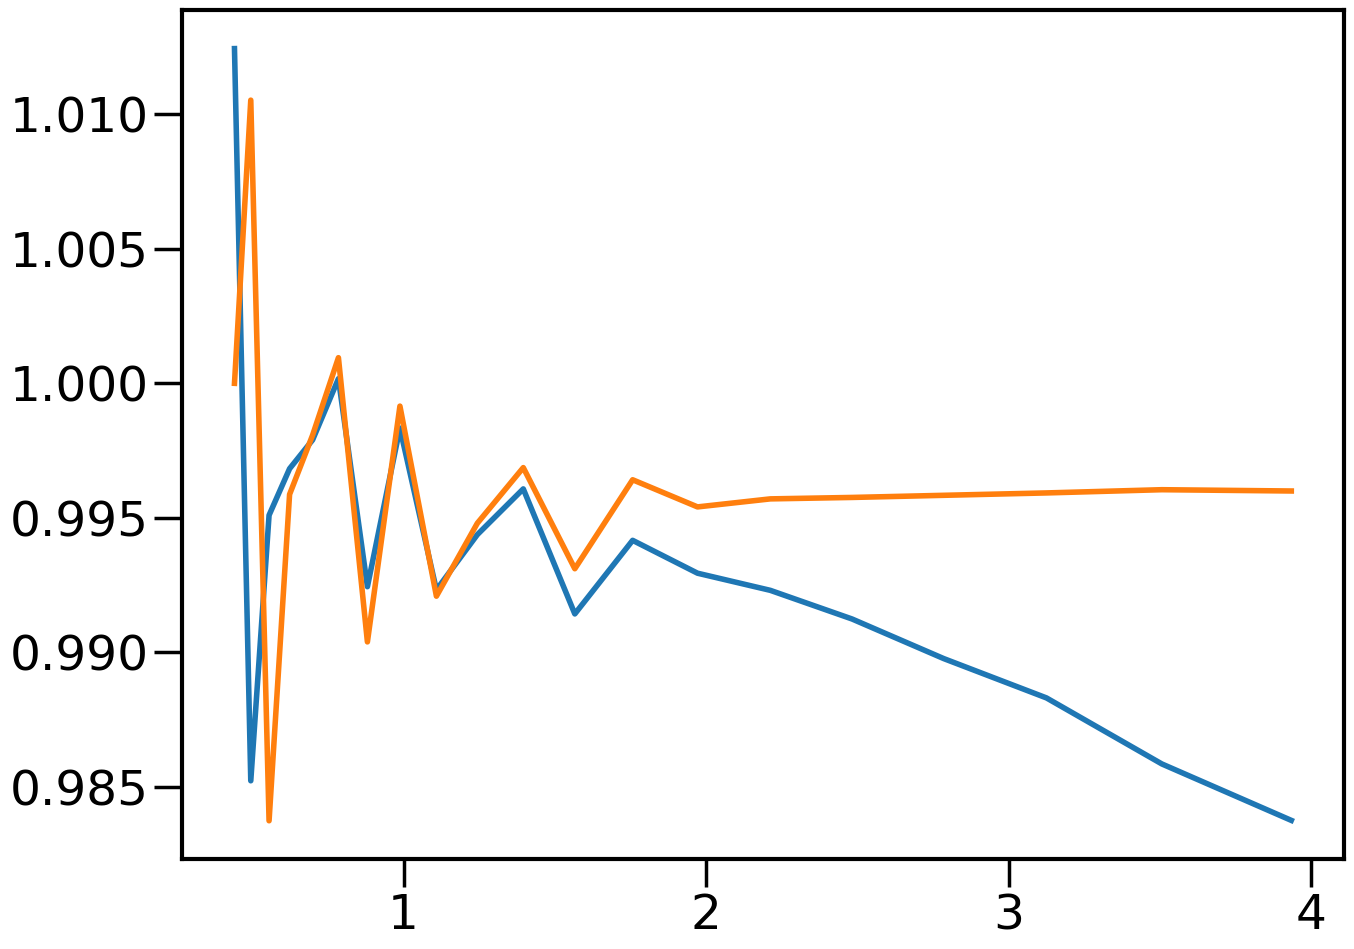

In [80]:
plot(thb,xiH0['xi'][:20]/xiH0t['xi'][:20])
plot(thb,xiH0['xi'][20:]/xiH0t['xi'][20:])

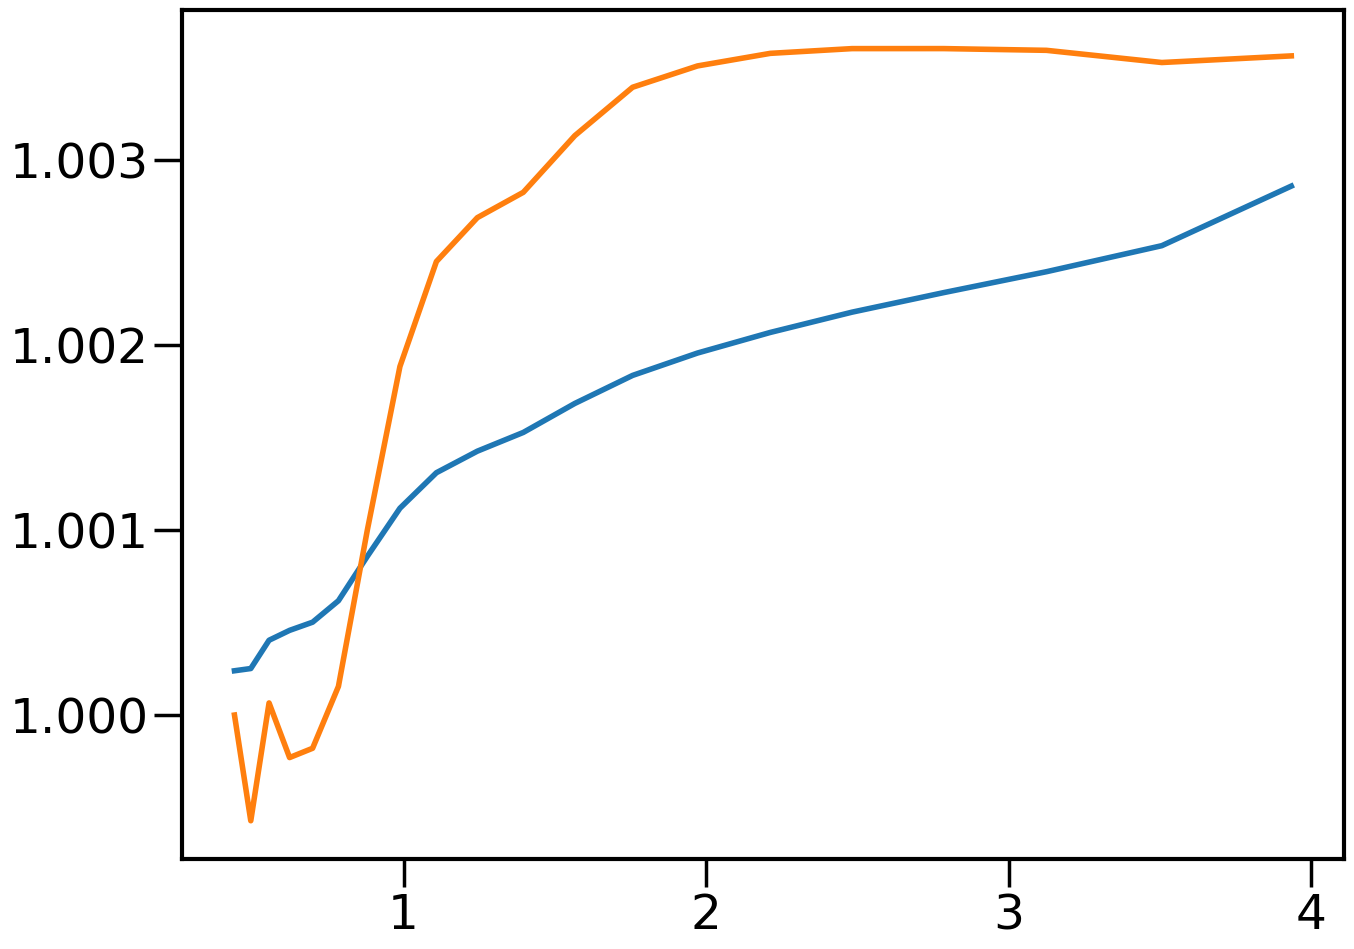

In [81]:
plot(thb,np.diag(xiH0['cov'])[:20]/np.diag(xiH0t['cov'])[:20])
plot(thb,np.diag(xiH0['cov'])[20:]/np.diag(xiH0t['cov'])[20:])

In [82]:
err=np.diag(xiH0['cov'])
err=np.sqrt(err)
corr=xiH0['cov']/np.outer(err,err)

errt=np.diag(xiH0t['cov'])
errt=np.sqrt(errt)
corrt=xiH0t['cov']/np.outer(errt,errt)

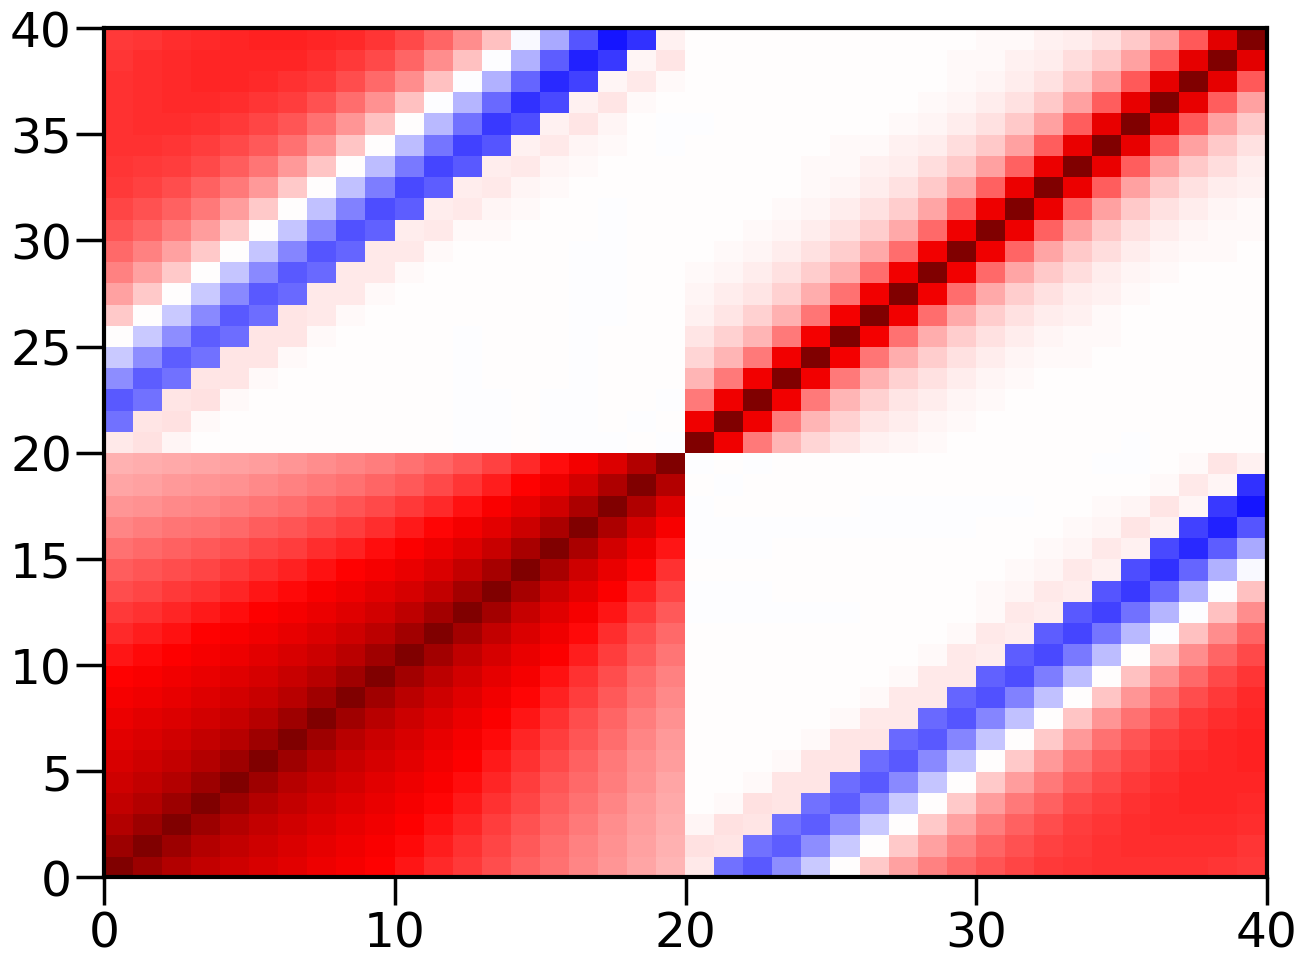

In [83]:
pcolor(corr,vmin=-1,vmax=1,cmap='seismic')

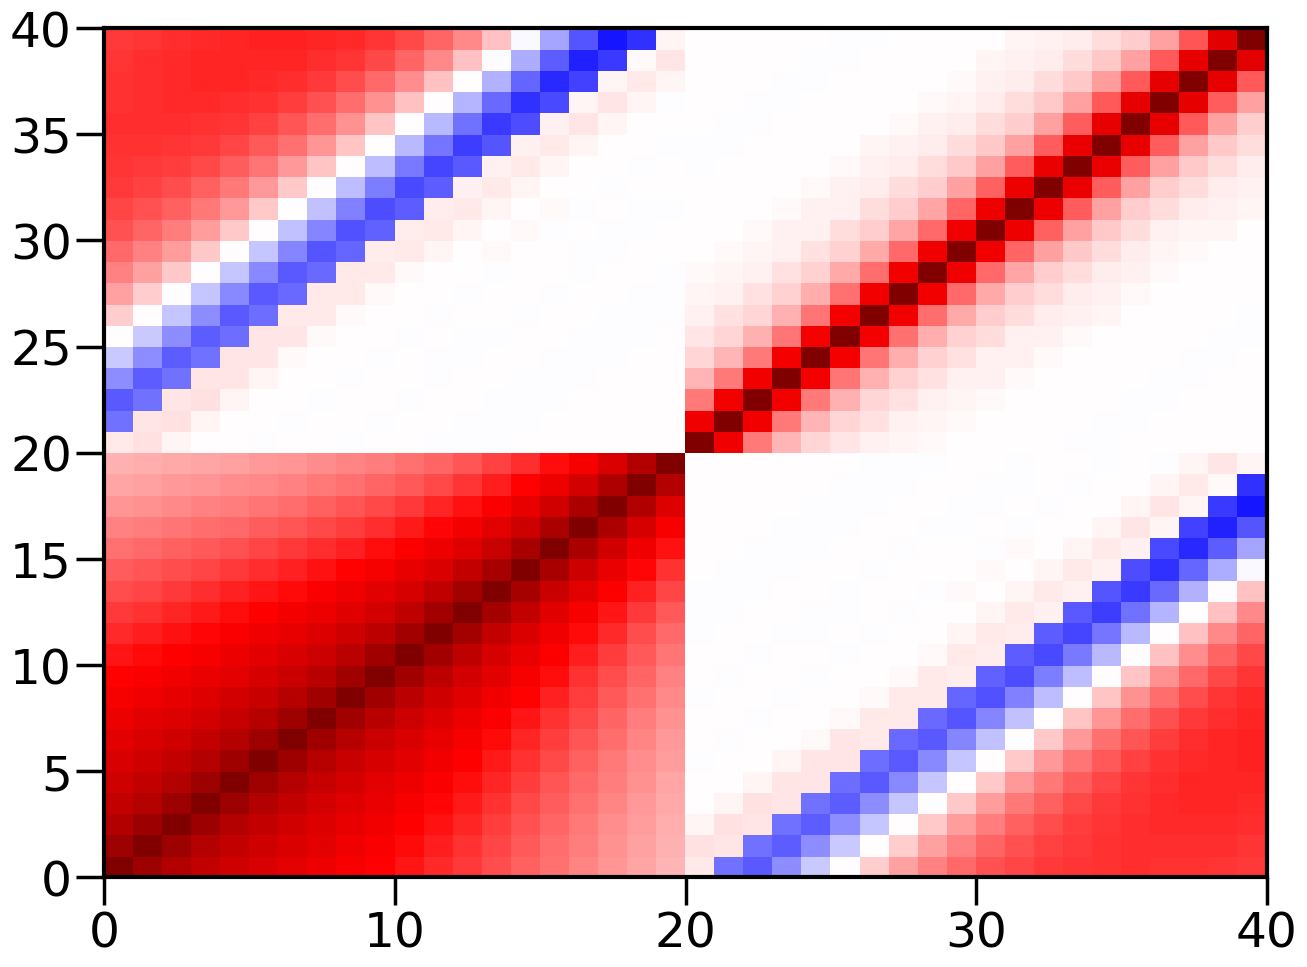

In [84]:
pcolor(corrt,vmin=-1,vmax=1,cmap='seismic')

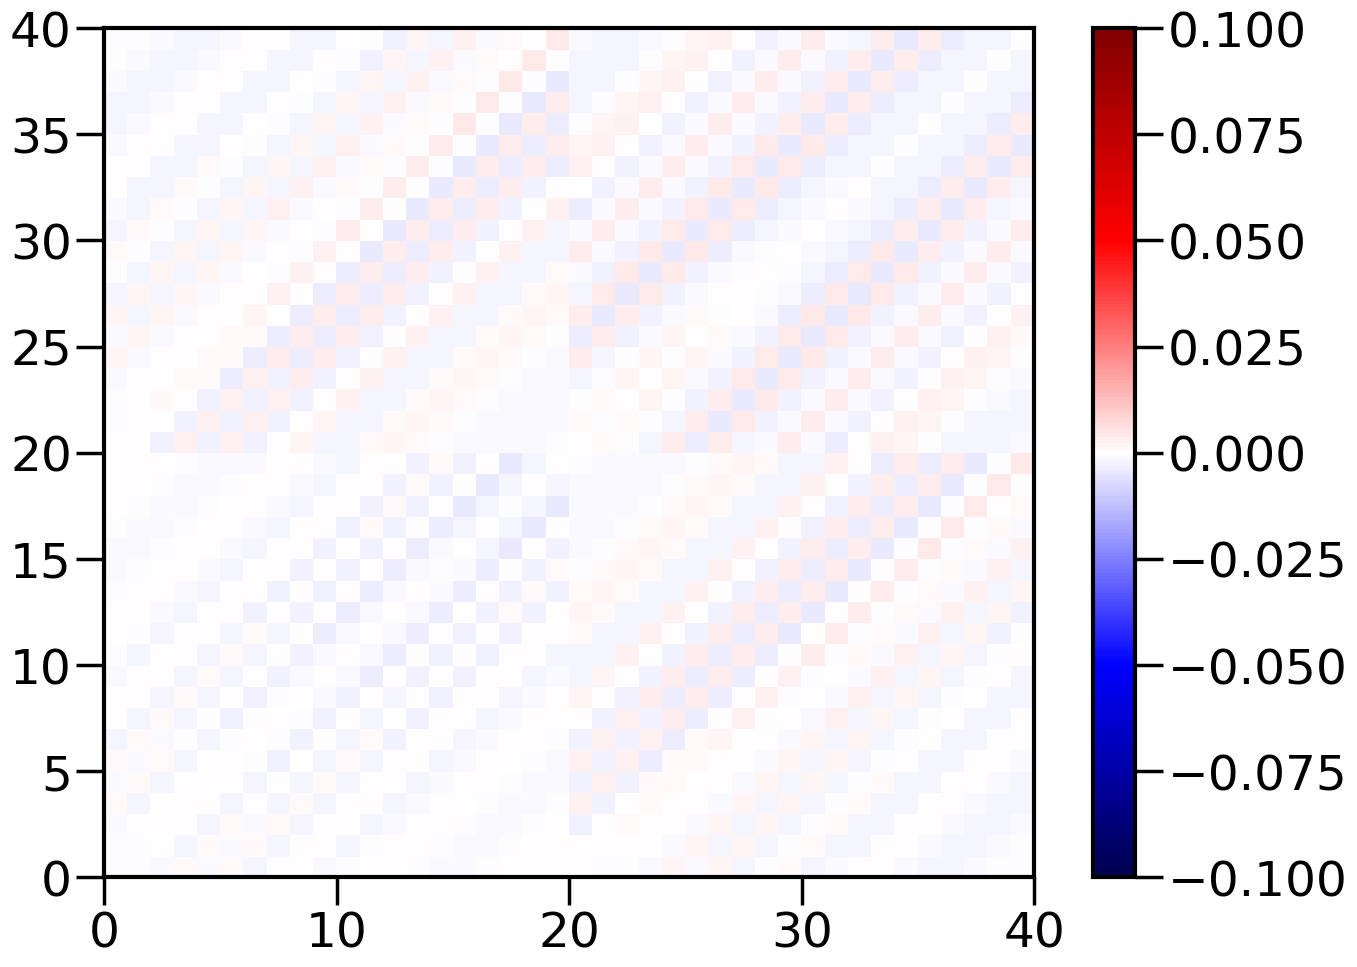

In [85]:
pcolor(corr-corrt,vmin=-.1,vmax=.1,cmap='seismic')
colorbar()

In [86]:
i_theta=700
plot(WTL.l,WTL.wig_d[s][i_theta,:],c='b')
xscale('log')
yscale('log')

NameError: name 'WTL' is not defined